In [1]:
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

D:\Usuarios\cvazquezlos\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
dataset = pd.read_csv('../datasets/regression/rating-cereals.csv')
dataset.columns = [re.sub('[^a-zA-Z]*', '', column) for column in dataset.columns]
scaled_dataset = (dataset-dataset.min())/(dataset.max()-dataset.min())
shuffle_scaled_dataset = shuffle(scaled_dataset)
shuffle_scaled_dataset

,calories,protein,fat,sodium,fiber,rating
3,0.000000,0.6,0.0,0.437500,1.000000,1.000000
21,0.454545,0.2,0.0,0.593750,0.071429,0.347440
32,0.636364,0.4,0.6,0.234375,0.214286,0.367012
71,0.545455,0.0,0.2,0.437500,0.000000,0.128340
46,0.636364,0.2,0.2,0.593750,0.000000,0.157033
13,0.545455,0.0,0.2,0.562500,0.000000,0.062034
39,0.454545,0.6,0.4,0.468750,0.142857,0.360620
67,0.545455,0.2,0.2,0.625000,0.000000,0.274866
1,0.636364,0.4,1.0,0.046875,0.142857,0.210685
62,0.363636,0.4,0.0,0.000000,0.285714,0.745818


In [3]:
X = shuffle_scaled_dataset[['calories', 'protein', 'fat', 'sodium', 'fiber']]
y = shuffle_scaled_dataset[['rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)
INPUTS = X.shape[1]
OUTPUTS = y.shape[1]

n_hidden_structure = [4, 4, 2] # Distribution of the neurons along the hidden layers.
epochs = 100 # Number of epochs of the training process of a neural network.
batch_size = 4 # Batch size is the subgroups that will be created from the training dataframe.
learning_rate = 0.01

model = Sequential()
model.add(Dense(n_hidden_structure[0], input_dim=INPUTS, activation='relu'))
for layer in n_hidden_structure[1:]:
    model.add(Dense(layer, activation='relu'))
model.add(Dense(OUTPUTS, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


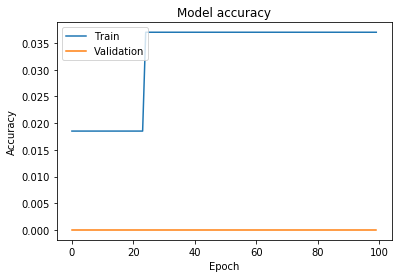

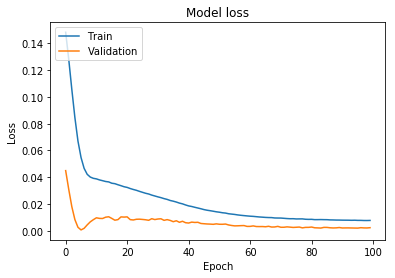

In [4]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=epochs, batch_size=batch_size, verbose=0)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plot_model(model)